## Walking through feature/emissions in lcdmpc

In [1]:
%load_ext autoreload
%autoreload 2

import compute_emissions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/aumc1/lib/python3.9/site-packages/pyoptsparse/pyOpt_MPI.py:68: UserWarning: mpi4py could not be imported. mpi4py is required to use the parallel gradient analysis and parallel objective analysis for non-gradient based optimizers. Continuing using a dummy MPI module from pyOptSparse.
  warnings.warn(warn)


Outputs with and without emissions

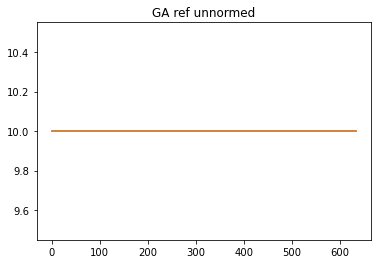

In [2]:
df_no_emissions = compute_emissions.compute_emissons(no_hr_sim=10,temperature_factor=7203244934.421581,  emissions_factor = 0, tracking_factor = 0)
df_emissions = compute_emissions.compute_emissons(no_hr_sim=10, emissions_factor = 4170.22004702574 , temperature_factor=  7203244934.421581 ,  tracking_factor =  0)

Visualization

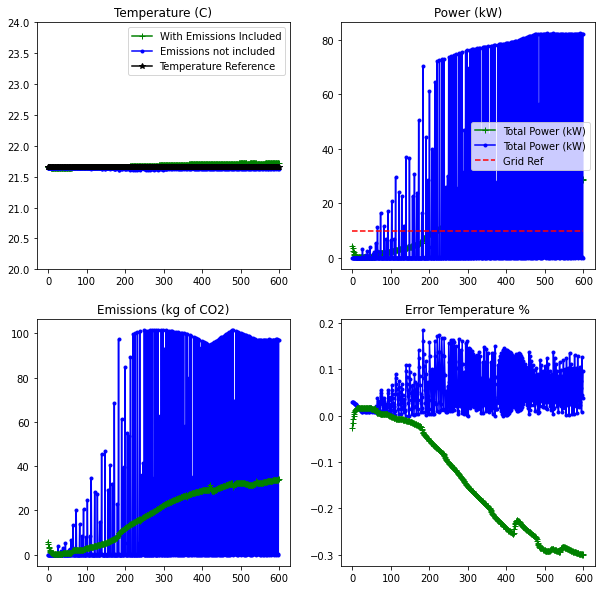

In [3]:
# Temperature
fig, ax = plt.subplots(2,2, figsize = (10, 10))
ax[0,0].plot(df_emissions["Temperature (C)"], 'g+-', label = "With Emissions Included")
ax[0,0].plot(df_no_emissions["Temperature (C)"], 'b.-', label = "Emissions not included")
ax[0,0].plot(21.65*np.ones(len(df_emissions)), 'k*-', label = "Temperature Reference", )
ax[0,0].title.set_text("Temperature (C)")
ax[0,0].set_ylim([20,24])

ax[0,0].legend()

# Power
ax[0,1].plot(df_emissions["Total Power (kW)"], 'g+-', label = "Total Power (kW)")
ax[0,1].plot(df_no_emissions["Total Power (kW)"], 'b.-', label = "Total Power (kW)")
ax[0,1].plot(df_emissions["Grid Power Reference (kW)"], 'r--', label = "Grid Ref")
ax[0,1].title.set_text("Power (kW)")
ax[0,1].legend()

# Emissions
ax[1,0].plot(df_no_emissions["Emissions (kg of CO2)"], 'b.-')
ax[1,0].plot(df_emissions["Emissions (kg of CO2)"], 'g+-')
ax[1,0].title.set_text("Emissions (kg of CO2)")

# Error %
ax[1,1].plot(np.abs(df_no_emissions["Error Temperature (%)"]),'b.-')
ax[1,1].plot(df_emissions["Error Temperature (%)"], 'g+-')
ax[1,1].title.set_text("Error Temperature %")


### Different values of $Q_{emissions}$ and fixed $Q_{temperature} = 10^9$

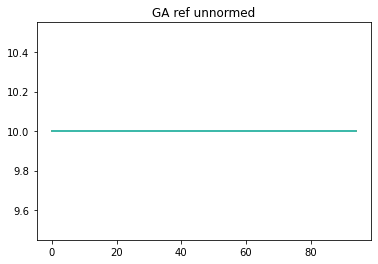

In [41]:
import numpy as np

emissions_list = []
error_list = []
temp_list = []
emissions_rate = []
q = np.logspace(-4, 1, num=20)
for q_val in q:
    
    df = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor= q_val, temperature_factor=1e9, tracking_factor= 0)

    emissions_list.append(df["Emissions (kg of CO2)"])
    error_list.append(df["Error Temperature (%)"])
    temp_list.append(df["Temperature (C)"])
    emissions_rate.append(df["Emissions Rate (kg of CO2/MWh)"])

Visualize data for different Q values. 

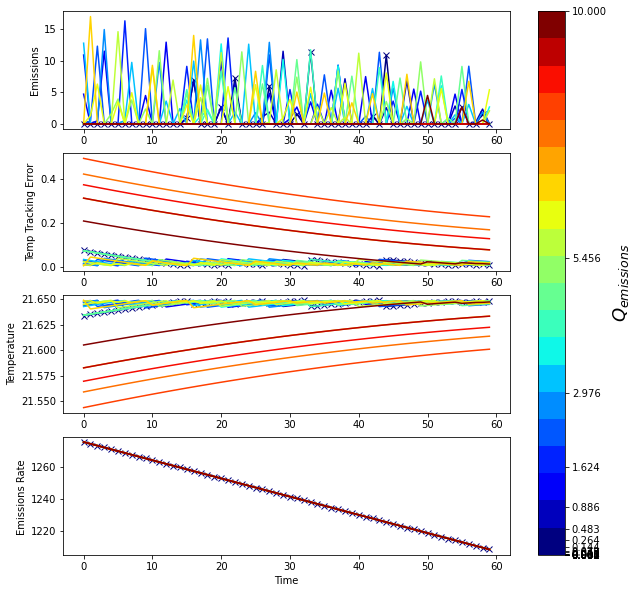

In [54]:
import numpy as np

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(q))))
fig, ax = plt.subplots(4, 1 , figsize = (10, 10))
for i in range(len(q)):
    cur_color = next(colors)
    if i == 0:
        m = "x"
    else:
        m = ""
    ax[0].plot(emissions_list[i], color=cur_color, marker = m, label = f"Q = {q[i]}")
    ax[0].set_ylabel ("Emissions")
    ax[1].plot(error_list[i], color=cur_color,marker = m, label = f"Q = {q[i]}" )
    ax[1].set_ylabel ("Temp Tracking Error")
    ax[2].plot(temp_list[i], color = cur_color ,marker = m, label = f"Q = {q[i]}")
    ax[2].set_ylabel ("Temperature")
    ax[3].plot(emissions_rate[i], color = cur_color,marker = m, label = f"Q = {q[i]}")
    ax[3].set_ylabel ("Emissions Rate ")
    ax[3].set_xlabel("Time")
# creating ScalarMappable

import matplotlib
norm = matplotlib.colors.Normalize(vmin=min(q), vmax=max(q))

cmap = plt.get_cmap('jet', len(q))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax.ravel().tolist(), ticks=q, )
cbar.set_label('$Q_{emissions}$',size=18)



### Relationship btw emissisions and emissions rate.

<AxesSubplot:xlabel='Emissions Rate (kg of CO2/MWh)', ylabel='Emissions (kg of CO2)'>

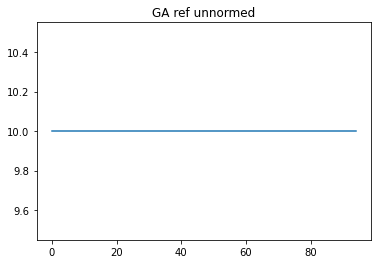

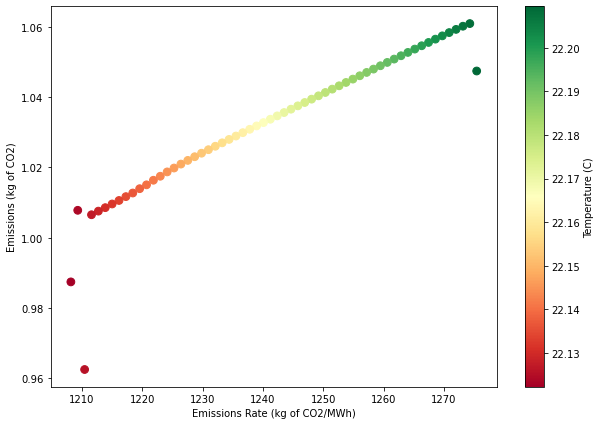

In [55]:
df = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor = 10, temperature_factor=0, tracking_factor= 0)
fig, ax = plt.subplots(figsize = (10,7) )
df.plot(kind='scatter', x='Emissions Rate (kg of CO2/MWh)', y='Emissions (kg of CO2)', s=60, c='Temperature (C)', cmap='RdYlGn', ax = ax)

## Temperature tracking only

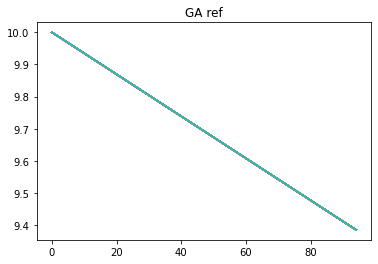

In [62]:
import numpy as np

emissions_list = []
error_list = []
temp_list = []
emissions_rate = []
q = np.logspace(0, 9, num=30)
for q_val in q:
    
    df = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor= 0, temperature_factor=q_val, tracking_factor= 0)

    emissions_list.append(df["Emissions (kg of CO2)"])
    error_list.append(df["Error (%)"])
    temp_list.append(df["Temperature (C)"])
    emissions_rate.append(df["Emissions Rate (kg of CO2/MWh)"])

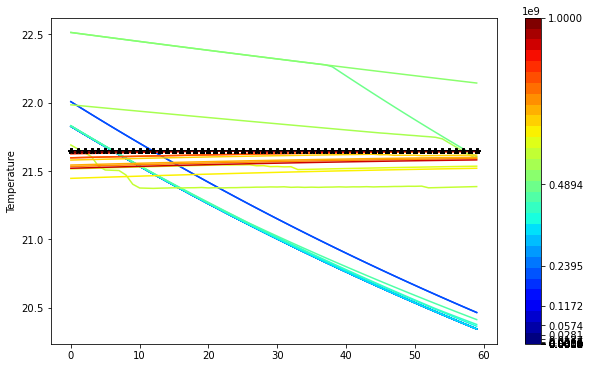

In [67]:

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(q))))
fig, ax = plt.subplots(1, 1 , figsize = (10, 6))
for i in range(len(q)):
    cur_color = next(colors)
    if i == 0:
        m = ""
    else:
        m = ""
    ax.plot(temp_list[i], color = cur_color ,marker = m, label = f"Q = {q[i]}")
    ax.plot(21.65*np.ones(len(df_emissions)), 'k*', label = "Temperature Reference", )
    ax.set_ylabel ("Temperature")

import matplotlib
norm = matplotlib.colors.Normalize(vmin=min(q), vmax=max(q))

cmap = plt.get_cmap('jet', len(q))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,  ticks=q)

### Power tracking with varing $Q_{emissions}$.

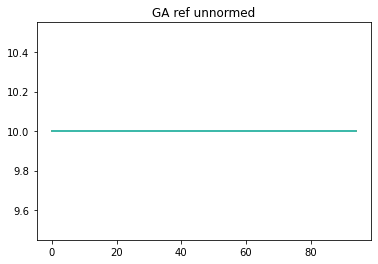

In [57]:
emissions_list = []
error_list = []
temp_list = []
emissions_rate = []
q = np.logspace(-4, 1, num=20)
for q_val in q:
    df = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor= q_val, temperature_factor=0, tracking_factor= 1)
    emissions_list.append(df["Emissions (kg of CO2)"])
    error_list.append(df["Error Temperature (%)"])
    temp_list.append(df["Temperature (C)"])
    emissions_rate.append(df["Emissions Rate (kg of CO2/MWh)"])


In [4]:

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(q))))
fig, ax = plt.subplots(4, 1 , figsize = (10, 10))
for i in range(len(q)):
    cur_color = next(colors)
    if i == 0:
        m = "x"
    else:
        m = ""
    ax[0].plot(emissions_list[i], color=cur_color, marker = m, label = f"Q = {q[i]}")
    ax[0].set_ylabel ("Emissions")
    ax[1].plot(error_list[i], color=cur_color,marker = m, label = f"Q = {q[i]}" )
    ax[1].set_ylabel ("Temp Tracking Error")
    ax[2].plot(temp_list[i], color = cur_color ,marker = m, label = f"Q = {q[i]}")
    ax[2].set_ylabel ("Temperature")
    ax[3].plot(emissions_rate[i], color = cur_color,marker = m, label = f"Q = {q[i]}")
    ax[3].set_ylabel ("Emissions Rate ")
    ax[3].set_xlabel("Time")
# creating ScalarMappable

import matplotlib
norm = matplotlib.colors.Normalize(vmin=min(q), vmax=max(q))

cmap = plt.get_cmap('jet', len(q))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax.ravel().tolist(), ticks=q, )
cbar.set_label('$Q_{emissions}$',size=18)


NameError: name 'q' is not defined

### Use BayesOpt to find optimal q. 

In [43]:
from bayes_opt import BayesianOptimization
import numpy as np

In [44]:
qbounds = {'q_temp': (0, 1e10), 'q_emissions': (0, 1e4)}


In [46]:


def q_func(q_temp, q_emissions):
    '''Minimize temperature tracking error and emissions'''

    df_emissions = compute_emissions.compute_emissons(no_hr_sim=1, emissions_factor = q_emissions, temperature_factor= q_temp, tracking_factor =  0 )

 
    return -np.sqrt(np.mean((df_emissions["Error Temperature (%)"])**2)) - np.sqrt(np.mean((df_emissions["Emissions (kg of CO2)"])**2))


In [47]:
optimizer = BayesianOptimization(
    f=q_func,
    pbounds=qbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

|   iter    |  target   | q_emis... |  q_temp   |
-------------------------------------------------
|  1        | -0.467    |  4.17e+03 |  7.203e+0 |
|  2        | -0.6575   |  1.144    |  3.023e+0 |
|  3        | -0.479    |  1.088e+0 |  3.689e+0 |
|  4        | -0.937    |  8.3e+03  |  6.601e+0 |
|  5        | -0.4828   |  1.493e+0 |  6.288e+0 |
|  6        | -0.4886   |  860.7    |  7.587e+0 |
|  7        | -3.236    |  3.956e+0 |  1.615e+0 |
|  8        | -2.337    |  8.877e+0 |  4.472e+0 |
|  9        | -0.893    |  4.323e+0 |  3.52e+09 |
|  10       | -1.456    |  6.099e+0 |  3.929e+0 |
|  11       | -0.4872   |  5.532e+0 |  7.02e+09 |
|  12       | -0.4749   |  1.484e+0 |  4.067e+0 |


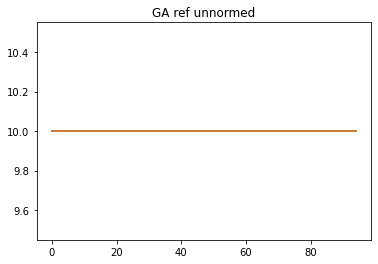

In [48]:
optimizer.maximize(
    init_points=2,
    n_iter=10,
)

In [49]:
print(optimizer.max)

{'target': -0.4669834274737748, 'params': {'q_emissions': 4170.22004702574, 'q_temp': 7203244934.421581}}


In [50]:
7203244934.421581 * 1e-9

7.203244934421582

MPC:

min_x x'Qx


bayes_opt:

min_Q x'Qx

In [4]:
2447 - 1869


578

In [5]:
3175 - 578

2597

In [8]:
2600*2 - 1200 - 503 -179

3318